In [1]:
from altaipony.lcio import from_TargetPixel_source
import numpy as np
import matplotlib.pyplot as plt

Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/jeepney/low_level.py:251: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  valtype = parse_signature(list(sig))
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/jeepney/low_level.py:251: ResourceWarning: unclosed <socket.socket fd=59, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  valtype = parse_signature(list(sig))
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/astropy/extern/bundled/six.py:60: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.

Find and download the TargetPixelFile for your light curve:

In [2]:
flc = from_TargetPixel_source("10002792", quarter=2)

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/Kepler/kplr010002792_lc_Q011111111111111111/kplr010002792-2009259160929_lpd-targ.fits.gz with expected size 2258267.
6% (279/4354) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (279/4354) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Find the gaps in the light curve to inform the de-trending algorithm. 

The de-trending splits the light curve in continuous chunks to avoid flukes from over-fitting.

In [3]:
flc = flc.find_gaps()
splits = [j for (i,j) in flc.gaps]
splits

[570, 2495, 2807, 3967, 4070]

De-trend the light curve using K2SC, save the result in a .fits file. Do not forget to pass the splits. 

Reminder lest things break: Make sure you installed K2SC from my [fork](https://github.com/ekaterinailin/k2sc) of it.

If you want to check if it worked: Different `max_sigma` should give different numbers in the de-trending protocol that you see when you run the cell below:

    Flagged X ( X.X%) outliers.)
    

In [4]:
flcd = flc.detrend(de_niter=10, splits=splits, max_sigma=3)

Using split values [570, 2495, 2807, 3967, 4070] given from the command line
Starting initial outlier detection at 3sigma.
iteration 1 at normalized median flux1.00000 +/- 0.00846
Masked measurements before mask expansion:  3
Masked measurements after mask expansion:  3
iteration 2 at normalized median flux1.00000 +/- 0.00846
Masked measurements before mask expansion:  3
Masked measurements after mask expansion:  3
  Flagged 3 ( 0.1%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    1.16 (fap 0.0000e+00 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -4192.901413733671
  DE iteration %3i -ln(L) %4.1f 1 -4192.901413733671
  DE iteration %3i -ln(L) %4.1f 2 -4192.901413733671
  DE iteration %3i -ln(L) %4.1f 3 -4192.901413733671
  DE iteration %3i -ln(L) %4.1f 4 -4192.901413733671
  DE iteration %3i -ln(L) %4.1f 5 -4192.901413733671
  DE iteration %3i -ln(

De-trending successfully completed.


  CDPP - raw - %6.3f 6863.666116933351
  CDPP - position component removed - %6.3f 6839.556694345599
  CDPP - full reduction - %6.3f 244.48143328705646
Detrending time %6.3f 124.88991904258728


Now you can visually compare the results:

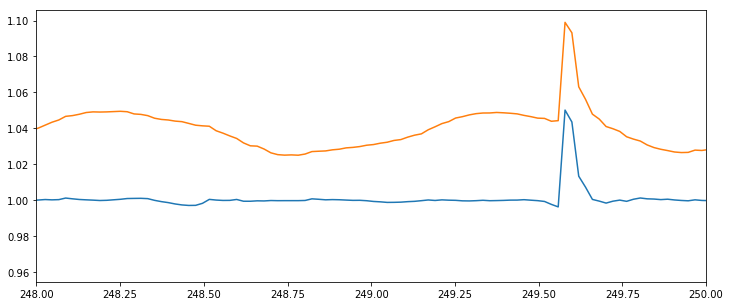

In [11]:
plt.figure(figsize=(12,5))
plt.plot(flcd.time,flcd.detrended_flux / np.nanmedian(flcd.detrended_flux))
plt.plot(flcd.time, flcd.flux / np.nanmedian(flcd.flux))
plt.xlim(248,250);


The above figure shows a flare that we can now try to find in the de-trended light curve:

In [6]:
flcd = flcd.find_flares()
flcd.flares.sort_values(by="ed_rec", ascending=False)

Found 11 candidate(s) in the (0,570) gap.
Found 41 candidate(s) in the (570,2495) gap.
Found 6 candidate(s) in the (2495,2807) gap.
Found 49 candidate(s) in the (2807,3967) gap.
Found 0 candidate(s) in the (3967,4070) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
90,0.050376,6883,6888,204.275352,0.266857,3684,3689,249.578843,249.681009
27,0.023631,4716,4720,71.589589,0.239905,1615,1619,205.299677,205.381411
19,0.009452,4216,4240,63.083607,0.400248,1121,1145,195.082817,195.573227
5,0.018071,3338,3341,58.843812,0.230869,357,360,177.141869,177.203171
76,0.003307,6495,6529,40.921549,0.648930,3305,3338,241.650768,242.345497
2,0.002890,3217,3231,38.146321,0.516284,238,252,174.669356,174.955432
22,0.001967,4328,4349,34.434960,0.627227,1232,1253,197.371398,197.800507
17,0.002340,4096,4118,33.723822,0.575539,1002,1024,192.630761,193.080305
54,0.001893,5759,5781,29.367532,0.610728,2629,2649,226.611849,227.061383
48,0.008018,5485,5494,26.981773,0.256624,2374,2383,221.013087,221.196989


There are a great many flare candidates in this light curve as a side effect of strong variability. One strategy to tell apart false positives from real flares in this case is to check the flares by eye. The other is to inject synthetic flares into the light curve and find out statistically, what the chances are to detect a flare candidate with these amplitudes and durations. While the former is faster and computationally less costly, the latter will be reproducible and provide additional information on top of flare / no flare.



Questions? Something does not work? Email me @ eilin@aip.de 